In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

## Punto 1

In [2]:
def ruleta_numero(apuesta):
    aleatorio = random.randrange(37)
    if (aleatorio == 0):
        return(apuesta*35)
    else:
        return(-apuesta)

In [3]:
def ruleta_color(apuesta):
    aleatorio = random.randrange(37)
    if (aleatorio > 18):
        return(apuesta)
    else:
        return(-apuesta)

In [4]:
def experimento(fondosIniciales,apuesta,iteraciones,juegos,ruleta):
    distribucion = np.zeros(juegos+1)
    for __ in range(iteraciones):
        fondos = fondosIniciales
        distribucion[0] += fondos
        for i in range(juegos):
            #random.seed(datetime.now().microsecond)
            fondos += ruleta(apuesta)
            distribucion[i+1] += fondos
    return(distribucion/iteraciones)

In [5]:
def experimento2(fondosIniciales,apuesta,iteraciones,juegos,ruleta):
    quebrados = 0
    tiempo = []
    for __ in range(iteraciones):
        fondos = fondosIniciales
        for i in range(juegos):
            #random.seed(datetime.now().microsecond)
            fondos += ruleta(apuesta)
            if (fondos == 0):
                quebrados += 1
                tiempo.append(i)
                break
    return([quebrados,np.mean(tiempo)+1])

In [6]:
def experimento3(fondosIniciales,apuestaInicial,iteraciones,juegos,ruleta):
    no_quebrados = []
    for __ in range(iteraciones):
        fondos = fondosIniciales
        apuesta = apuestaInicial
        for i in range(juegos):
            #random.seed(datetime.now().microsecond)
            ganacia = ruleta(apuesta)
            fondos += ganacia
            if (fondos <= 0):
                break
            if(ganacia < 0):
                apuesta = np.amin([apuesta*2,fondos])
            else:
                apuesta = apuestaInicial
            if (i == (juegos - 1)):
                no_quebrados.append(fondos)
    return(no_quebrados)

## Parte A

### A1

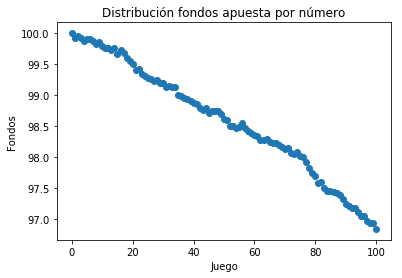

In [7]:
numero_d = experimento(100,1,20000,100,ruleta_numero)
x=np.arange(len(numero_d))
plt.scatter(x,numero_d)
plt.title('Distribución fondos apuesta por número')
plt.xlabel('Juego')
plt.ylabel('Fondos')
plt.savefig('A1_adturo.png')
plt.show()

### A2

In [8]:
np.mean(numero_d)

98.589823762376255

### A3 

In [9]:
resultados_quebrados_numero = experimento2(100,1,20000,550,ruleta_numero)
print(resultados_quebrados_numero[0])
print(resultados_quebrados_numero[1])

9537
247.650204467


## Parte B

### B1

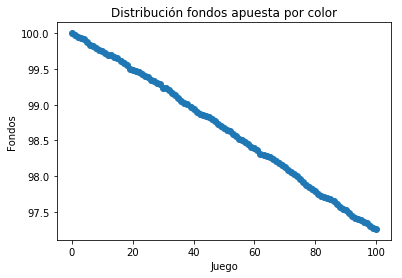

In [10]:
color_d = experimento(100,1,10000,100,ruleta_color)
x=np.arange(len(color_d))
plt.scatter(x,color_d)
plt.title('Distribución fondos apuesta por color')
plt.xlabel('Juego')
plt.ylabel('Fondos')
plt.savefig('B1_adturo.png')
plt.show()

### B2

In [11]:
np.mean(color_d)

98.658358415841576

### B3

In [24]:
resultados_quebrados_color = experimento2(100,1,10000,11000,ruleta_color)
print(resultados_quebrados_color[0])
print(resultados_quebrados_color[1])

9874
3586.09114847


## Parte C

### C1

In [ ]:
sniping_numero = experimento3(100,1,200000000,100,ruleta_numero)
print(len(sniping_numero))
print(np.mean(sniping_numero))

### C2

In [30]:
sniping_color = experimento3(100,1,100000,100,ruleta_color)
print(len(sniping_color[0]))
print(np.mean(sniping_color[0]))

67271
136.794874463
